<a href="https://colab.research.google.com/github/aloiswirth/deep-learning-with-python-notebooks/blob/master/chapter03_introduction-to-keras-and-tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [3]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 1.7884035 ]
 [-0.44494918]
 [-2.0396152 ]], shape=(3, 1), dtype=float32)


In [4]:
x = tf.random.uniform(shape=(4, 2), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.44217217 0.562083  ]
 [0.70793235 0.15376997]
 [0.63157    0.08482563]
 [0.15667284 0.89514995]], shape=(4, 2), dtype=float32)


**NumPy arrays are assignable**

In [5]:
import numpy as np
x = np.ones(shape=(2, 2))
x

array([[1., 1.],
       [1., 1.]])

In [6]:
x[0, 0] = 0.
x

array([[0., 1.],
       [1., 1.]])

**Creating a TensorFlow variable**

In [7]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.8483186 ],
       [-0.05014143],
       [-0.7362515 ]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [8]:
v.assign(tf.ones((3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>


**Assigning a value to a subset of a TensorFlow variable**

In [9]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [14]:
v.assign_sub(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[5.],
       [3.],
       [3.]], dtype=float32)>

In [24]:
v.assign_add(tf.random.normal(shape=(3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[8.769317 ],
       [2.8318605],
       [3.6514177]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [26]:
a = 4 * tf.ones((2, 2))
b = tf.square(a)
print("b" +'\n', b)
c = tf.sqrt(a)
print("c" +'\n', c)
d = b + c
print("d" +'\n', d)
e = tf.matmul(a, b)
print("e" +'\n', e)
e *= d
print("e = new  e *=d " +'\n', e)

b
 tf.Tensor(
[[16. 16.]
 [16. 16.]], shape=(2, 2), dtype=float32)
c
 tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
d
 tf.Tensor(
[[18. 18.]
 [18. 18.]], shape=(2, 2), dtype=float32)
e
 tf.Tensor(
[[128. 128.]
 [128. 128.]], shape=(2, 2), dtype=float32)
e = new  e *=d 
 tf.Tensor(
[[2304. 2304.]
 [2304. 2304.]], shape=(2, 2), dtype=float32)


In [29]:
a = 4 * tf.random.normal((2, 2))
print("a" +'\n', a)
b = tf.square(a)
print("b" +'\n', b)
c = tf.sqrt(b)
print("c" +'\n', c)
d = b + c
print("d" +'\n', d)
e = tf.matmul(a, b)
print("e" +'\n', e)
e *= d
print("e = new  e *=d " +'\n', e)

a
 tf.Tensor(
[[11.17097   -2.7633238]
 [ 1.0539826  7.6622963]], shape=(2, 2), dtype=float32)
b
 tf.Tensor(
[[124.79057     7.635958 ]
 [  1.1108793  58.710785 ]], shape=(2, 2), dtype=float32)
c
 tf.Tensor(
[[11.17097    2.7633238]
 [ 1.0539826  7.6622963]], shape=(2, 2), dtype=float32)
d
 tf.Tensor(
[[135.96155   10.399282]
 [  2.164862  66.37308 ]], shape=(2, 2), dtype=float32)
e
 tf.Tensor(
[[1390.962    -76.93585]
 [ 140.03899  457.9076 ]], shape=(2, 2), dtype=float32)
e = new  e *=d 
 tf.Tensor(
[[189117.34      -800.07764]
 [   303.16507  30392.736  ]], shape=(2, 2), dtype=float32)


#### A second look at the GradientTape API

**Using the `GradientTape`**

In [32]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)


<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [33]:
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


**Using `GradientTape` with constant tensor inputs**

In [34]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

**Using nested gradient tapes to compute second-order gradients**

In [36]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
    print("speed of inner_tape=", speed)
acceleration = outer_tape.gradient(speed, time)
print("speed=", speed)
print("acceleration=", acceleration)


speed of inner_tape= tf.Tensor(0.0, shape=(), dtype=float32)
speed= tf.Tensor(0.0, shape=(), dtype=float32)
acceleration= tf.Tensor(9.8, shape=(), dtype=float32)


#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [38]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [43]:
positive_samples

array([[ 2.42832025,  0.32210866],
       [ 0.7801357 , -1.38049776],
       [ 5.77884018,  0.81468326],
       ...,
       [ 2.39824793, -0.69168376],
       [ 3.34565553, -0.15934775],
       [ 2.06695808, -1.03047009]])

**Stacking the two classes into an array with shape (2000, 2)**

In [39]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs

array([[-0.16006152,  2.261898  ],
       [ 0.61875415,  2.30668   ],
       [ 0.8970159 ,  3.5746047 ],
       ...,
       [ 2.398248  , -0.69168377],
       [ 3.3456554 , -0.15934776],
       [ 2.0669582 , -1.0304701 ]], dtype=float32)

**Generating the corresponding targets (0 and 1)**

In [40]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

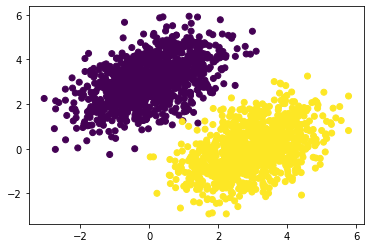

In [41]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [44]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [46]:
print(W)
print(b)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.27924037],
       [0.4220351 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


**The forward pass function**

In [45]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [47]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [48]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [ ]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

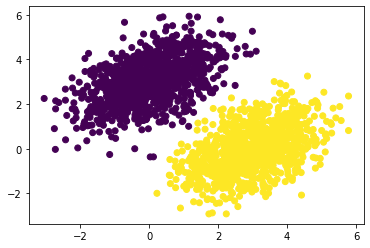

In [50]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

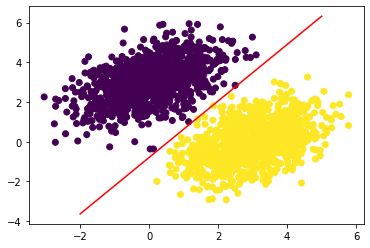

In [54]:
x = np.linspace(-2, 5, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [ ]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

#### Automatic shape inference: Building layers on the fly

In [ ]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [ ]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [ ]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

In [ ]:
history.history

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

### Inference: Using a model after training

In [ ]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

## Summary